## A Taster to the Juxtorpus
<span style="font-size:16px;">

This notebook showcases some usages of the ATAP Juxtorpus tool, which includes two major components: **Corpus** and **Jux**. 
The **Corpus** package enables the user to upload, select and build their texts as a Corpus object. The Corpus can then be explored and sliced flexibly into sub-corpus based on various metadata or text patterns within the contents. Several out-of-box tools and visualisations come with the Corpus object so that the user can quickly explore the Corpus and sub-Corpus in a unified manner, and more functions will be developed for similar purposes.

The **Jux** package, on the other hand, is a simpler tool designed to compare and identify the contrasts between a pair of corpora. Although the comparison sounds like a simple task, when this is conducted on corpora refined with specific conditions and using different metrics of comparison, a lot of insights could be extracted from the analysis.

Besides the two new packages to the ATAP text analytic tool suite, this notebook will also demostrate how to integrate other ATAP tools together with the corpus in order to create a reuseable workflow for your research, these include _Concordance Tool_, _Quotations Tool_, _Semantic Tagger_, _Text Similarity Scorer_ etc.

Interactive Widgets were developed for several common functions to make the operations easier for people without technical backgrounds, and this notebook demonstrate both method if a widget is available for the operation.
</span>
<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>



In [2]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [3]:
import os
while 'juxtorpus' not in os.listdir():
    os.chdir('../')
# if  not 'juxtorpus' in os.listdir():
#     os.chdir('../../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from pathlib import Path
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
# from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus import analyse
from juxtorpus.corpus.corpora import Corpora

import warnings
warnings.filterwarnings('ignore')

from atap_widgets.concordance import ConcordanceTable, ConcordanceWidget, ConcordanceLoader
from atap_widgets.concordance import prepare_text_df
from quotation_tool import QuotationTool


from spacytextblob.spacytextblob import SpacyTextBlob
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package punkt to /Users/mily/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Corpus Building and Exploration

<span  style="font-size:16px;">

The **Corpus** package is the essential platform for text operations and explorations. Users can upload or link their text collections with associated metadata, then compile the selected texts as a *Corpus* object. A *Corpus* object consists of a number of *documents* and the metadata that describe the documents, such as *title*, *publish date*, *author*, *word count* etc.  
A corpus can be built with either codes or an interactive widget within this notebook. When the input data are in the format of a spreadsheet, each row of data will be come one document. The user needs to specify the column for the text contents, and all other columns are compiled as associating metadata. The data type, e.g. *numeric*, *text*, *datetime*, *category*, need to be determined on the corpus building, and this affects how each meta data can be used in the further slicing operations.  
Once a corpus is built, the user is provided some basic out-of-box tools to explore the text contents or metadata, such as generating a word frequency table, plotting a word cloud, create a timeline plot of the documents or certain patterns in the text, or to perform certain analysis on the corpus with either ATAP or external tools, e.g. running *concordance tool*, *quotation tool* or *LDA topic modelling* etc.  
### The following section will demonstrate how to upload your text, build a corpus and explore it's contents.
</span>

## 1.1 Upload your text and build a Corpus with corpus.widget()

#### The **Corpora()** creates a corpus container that holds many Corpus objects. Each corpus can be built and named within the builder widget after the text contents are uploaded. Once the column of text is selected, and the data type of each meta data is set, the user can name the corpus and click on the button **Build**. If no name is manually given, a random name will be given to the corpus.

In [4]:
corpora = Corpora()
corpora.widget()

<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>About the data</b> 

The uploaded data is a processed subset of a [Kaggle twitter dataset on Customer Service](https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter), and in this example we have included tweet messages posted between 10/2017 and 11/2017 about 4 companies (SpotifyCares, ComcastCares, AmericanAir, British_Airways).
</div>

### The Corpus we just built consists tweet conversations between customer cares of four companies and their happy/angry customers. We have named it as **CS** will explore the content a bit later and show you how to view it at different levels and granurities.

In [4]:
corpora.items()

['CS']

## 1.2 A few basic operations on your corpus
### A summary of your corpus

In [5]:
corpus = corpora['CS']
corpus.summary().T

,Name,Parent,Corpus Type,Number of Documents,Number of Total Words,Size of Vocabulary,mean Words per Document,min Words per Document,max Words per Document,metas
,CS,,Corpus,283489,4359630,172242,15,1,62,"in_response_to_tweet_id, company, inbound, author_id, created_at, tweet_id, conversation"


### Check the contents of the documents in the corpus

In [8]:
corpus.docs().head(5)
# corpora['CS'].to_dataframe().head(15)

0                               @115887 Hmm. Can you try restarting your device by holding the Sleep/Wake + Volume Down buttons for 10 seconds? Keep us posted /LS
1                                                                                                     @SpotifyCares doesn’t work and i even tried deleting the app
2    @SpotifyCares Premium &amp; when i️ have it on shuffle it turns off when the song is done and just plays in order and the repeat lights up but doesn’t repeat
3                                        @115887 Could you send us a DM with your account's email address? We'll take a look backstage /CH https://t.co/ldFdZRiNAt
4                             @115887 Thanks. Just to be sure, are you Free or Premium? Also, can you give us more info on what happens when you try using it? /CB
Name: document, dtype: object

### Check the contents of certain corpus meta data

In [9]:
companies = corpus.meta['company'].series.unique().tolist()
print(companies)

['spotifycares', 'british_airways', 'comcastcares', 'americanair']


### Generating a frequency table from the corpus

In [10]:
corpora['CS'].dtm.freq_table().series.sort_values(ascending=False)
#corpora['CS'].dtm.freq_table().series.sort_values(ascending=False)
#corpora['CS'].dtm.freq_table().series.sort_values(ascending=False).to_csv('./notebooks/demos/taster_workshop/freq_table.csv')

you       155356
the       145671
your       96142
and        93020
for        80506
           ...  
669154         1
669153         1
669152         1
669151         1
인피니트           1
Name: freq, Length: 172242, dtype: int64

## 1.3 Some visualisation from the corpus

### **Wordcloud** 
#### We can easily generate a wordcloud out of the corpus, and exclude certain words if they are blocking the view.

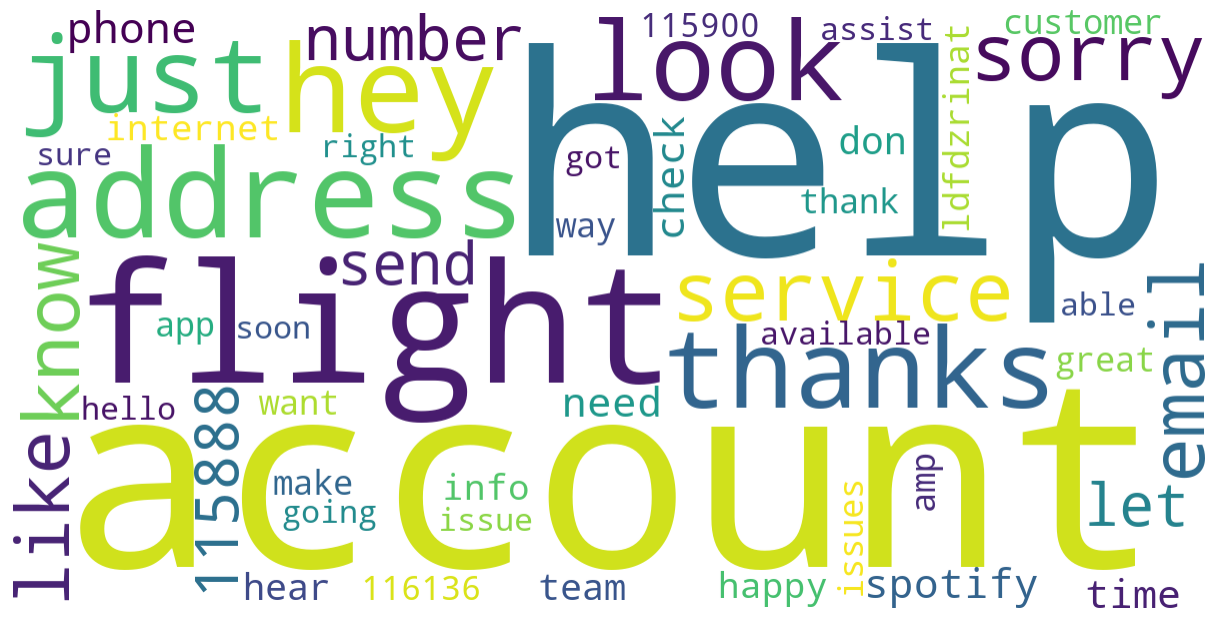

In [13]:
stop_words = ['https'] + companies
corpora['CS'].viz.wordcloud(stopwords=stop_words)

#### Create a subcorpus by randomly sampling the corpus, then display wordcloud out of that sub-corpus

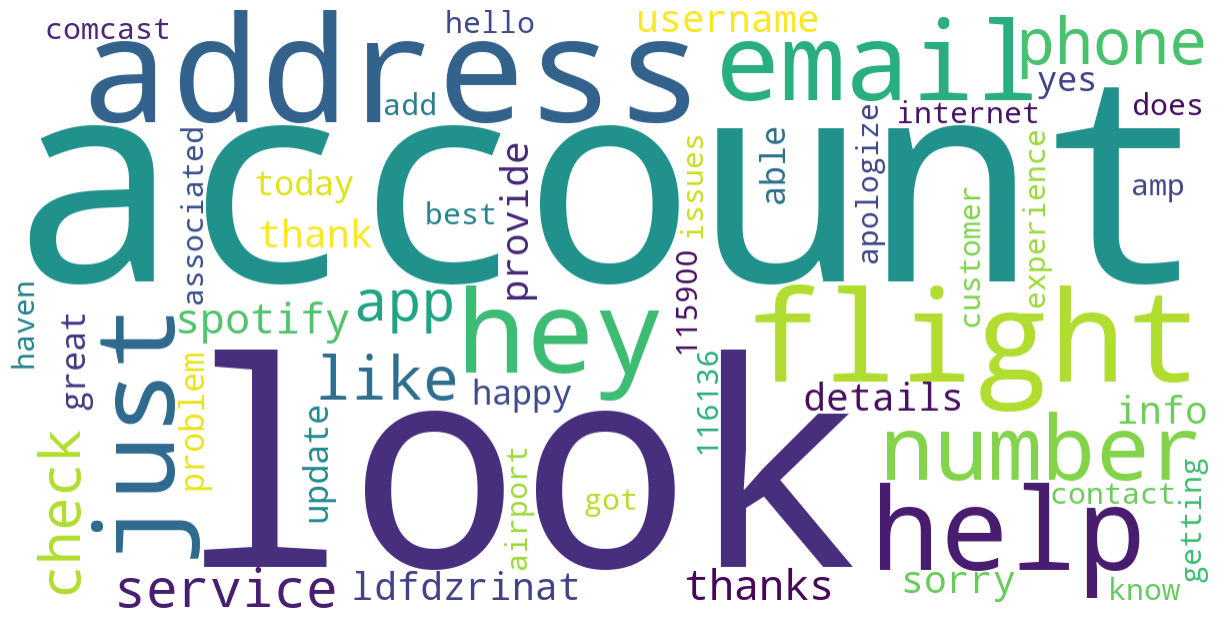

In [14]:
stop_words = ['https'] + companies
subcorpus = corpora['CS'].sample(100)
subcorpus.summary()
subcorpus.viz.wordcloud(stopwords = stop_words)

### **Concordance Tool**

### Use the [ATAP Concordance Tool](https://github.com/Australian-Text-Analytics-Platform/atap_widgets/tree/main) to check some corpus the contents and search for the contexts.
<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>ATAP Concordance Tool</b> 
The ATAP Concordance Tool is a widget developed by the Sydney Informatics Hub under the ATAP project so that the user could interactively search keyword and display the contexts around the keywords within a jupyter notebook. The widget can be used independently if needed.
</div>
<div class="alert alert-block alert-danger" style="font-size:16px;">
<b>Warning</b> 
The ATAP Concordance Tool is not designed to be used on large corpus. Make sure you do not input a large corpus to avoid long loading time. For this twitter dataset, it can process roughly 80 tweets per second, i.e. a corpus with 1000 tweets will take ~13 seconds to load and display.
</div>

In [15]:
import time
st = time.time()
conc = ConcordanceLoader(type='corpus', df_input = subcorpus)
conc.show()
print(time.time() - st, 'seconds')

1.3754611015319824 seconds


### **Timeline**
### With datetime metadata in this corpus, we can plot some timelines to view the historical activities.

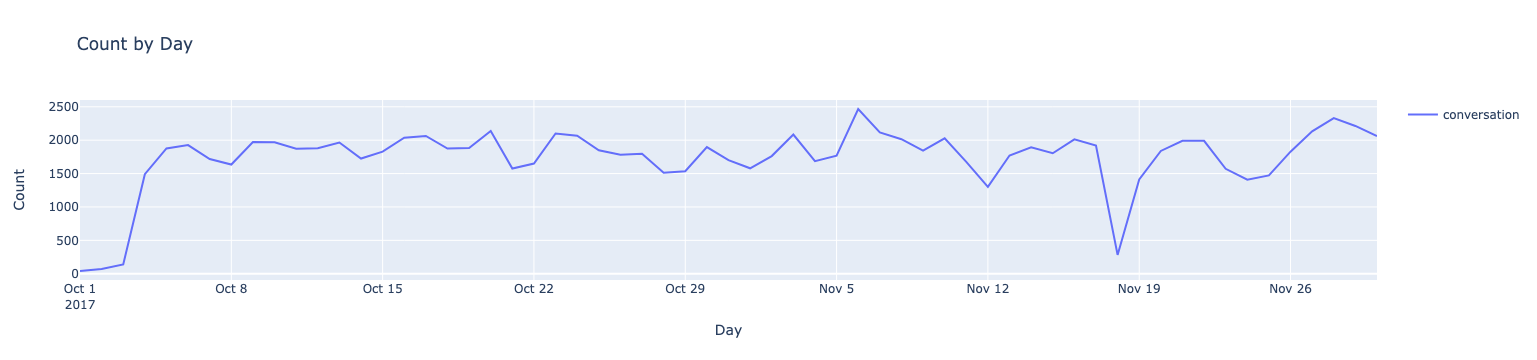

In [19]:
# corpora['CS'].viz.timeline('created_at', freq='1D')
corpora['CS'].viz.timeline('created_at', freq='1D', meta_name='conversation')

## 1.4 Build a corpus with code
<div class="alert alert-block alert-info" style="font-size:16px;">
<b>Using the Code or Widget</b>
    
The Juxtorpus is a python package developed to work without notebook, thus all operations can be done through python functions in code.

On the other hand, some widgets are developed as additional interactive components specifically for work on notebooks, with a purpose to make some common tasks easier for people with less coding skills. The widgets may not cover all the functions available in Juxtorpus, and sometimes it's easier to modify and repeat task in a chunk of code.
</div>

### The following is an example to build a corpus from a pre-exist CSV file

<div class="alert alert-block alert-warning" style="font-size:16px;">
    
In order to build your corpus with codes, you need to know the structure of your data, e.g. file path, file type, headers, data types of all metadata, and some understanding about the [Pandas](https://pandas.pydata.org) Dataframe.
</div>


In [5]:
use_cols = ['text', 'text_name', 'author', 'date', 'source']
dtypes = {'text': str, 
        'text_name': str, 
        'author':str,
        'date': str,
        'source':'category'}

df = pd.read_excel(Path('./notebooks/demos/taster_workshop/news.xlsx'),
                 usecols=use_cols, 
                 dtype=dtypes)
df['date'] = pd.to_datetime(df['date'])
corpus = Corpus.from_dataframe(df, col_doc='text', name='News')

corpora.add(corpus)

In [21]:
corpora.items()

['CS', 'News']

In [4]:
# # The Customer Service Corpus can be built with the following code.
# corpora = Corpora()
# use_cols = ['author_id', 'inbound', 'created_at', 'text', 'in_response_to_tweet_id', 'company', 'conversation']
# # dtypes = ['Int64', 'category', 'string', 'string', 'Int64', 'Int64', 'category', 'category']

# df = pd.read_csv(Path('./notebooks/demos/taster_workshop/twcs_sel.csv'),
#                  usecols=use_cols, 
#                  dtype={'author_id': str,
#                         'inbound': 'category',
#                         'created_at': str,
#                         'text':str,
#                         'in_response_tweet_id': 'Int64',
#                         'company': 'category', 
#                         'conversation': 'category'})

# df['created_at'] = pd.to_datetime(df['created_at'])
# # #corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.blank('en'))
# corpus = Corpus.from_dataframe(df, col_doc='text', name='CS')
# corpora.add(corpus)

# 2. Corpus Slicing
<div class="alert alert-block alert-info" style="font-size:16px;">
    
A slicing operation can be done through the corpora.widget().  
When a corpus is selected in the widget, the slicer pane expands and the corpus can be sliced based on the metadata. 
    
The slicing operations vary according to different data types of the used metadata, and the user can add and combine different operations for slicing a corpus.  
Within the widget, the size of new sub-corpus is displayed for the user's information.
</div>

## 2.1 Slicing with the widget

In [22]:
corpora.widget()

## 2.2 Slicing with codes
<div class="alert alert-block alert-info" style="font-size:16px;">
    
Depending on the data type of meta data, several functions can be used to slice your corpus. The user can call the slicer functions **corpus.slicer.filter_by_xxx()** with appropriate arguments, e.g.  
Categorical metadata: use _corpus.slicer.filter_by_item()_  
Datetime metadata: use _corpus.slicer.filter_by_datetime()_  
Numeric metadata: use _corpus.slicer.filter_by_range()_  
Text data: use _corpus.slicer.filter_by_regex()_   
And for more general and complex situtation, the user can define the slicing criteria and use _corpus.slicer.filter_by_condition()_ function.  
For more information, refer to the [Juxtorpus documentations]() (_under development_).
</div>

### In the following cell, we create four sub-corpora that consist of _inbound_ messages (from the customers) to each of the four companies, _AmericanAir_, _British_Airway_, _ComCast (telecommunication)_ and _Spotify_).  
### Each of these sub-corpora are added into the corpora, and can be sliced further within the widget.

In [23]:
temp = corpora['Customer']
AA_C = temp.slicer.filter_by_item('company', 'americanair')
AA_C.rename('AA_C')
BA_C = temp.slicer.filter_by_item('company', 'british_airways')
BA_C.rename('BA_C')
CC_C = temp.slicer.filter_by_item('company', 'comcastcares')
CC_C.rename('CC_C')
SP_C = temp.slicer.filter_by_item('company', 'spotifycares')
SP_C.rename('SP_C')
corpora.add([AA_C, BA_C, CC_C, SP_C])
corpora.items()

['CS', 'News', 'Customer', 'Service', 'AA_C', 'BA_C', 'CC_C', 'SP_C']

<div class="alert alert-block alert-warning" style="font-size:16px;">
<b>

## What is a sub-corpus
</b>
    
Each sub-corpus has a parent-corpus which indicates from which corpus the current corpus is sliced from, however a sub-corpus is still a corpus covering a sub-set documents of the original corpus, and everything works with a corpus can be done on a sub-corpus. 
A sub-corpus can be explored with the exact same functions and visualisations, e.g. the new _Frequency table_, _Word cloud_, _Timeline_ or _Summary_ will just be generated based on what's in the sub-corpus, so that you can understand how different each sub-corpus is.
</div>

In [26]:
corpora.widget()

### A simple example to slice by RegEx on text, find all customer message that include "thank" from BA_C corpus.

In [25]:
corpus = corpora['BA_C'].slicer.filter_by_regex('document', r'thank', ignore_case=True)
corpus.rename('BA_C_pos')
corpora.add(corpus)

## 2.3 Explore and compare the (sub-)corpora

### **Timelines** for comparing multiple corpora

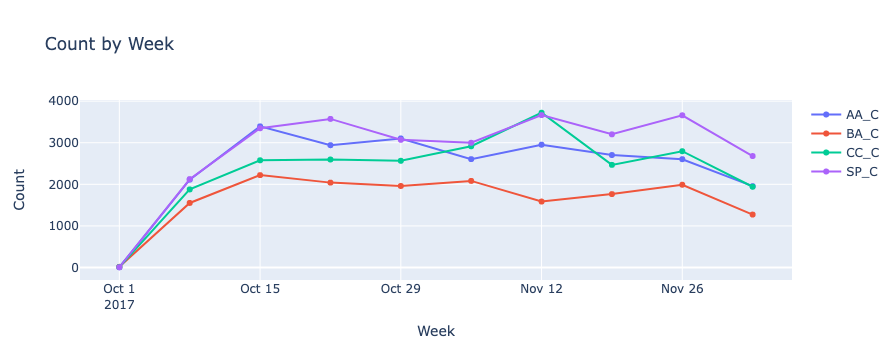

In [28]:
# corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D')
# corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1D', meta_name='conversation')
corpora.viz.timelines(['AA_C', 'BA_C', 'CC_C', 'SP_C'], 'created_at', freq='1W', meta_name='author_id')

### **WordCloud** and additional options for the wordcloud creation

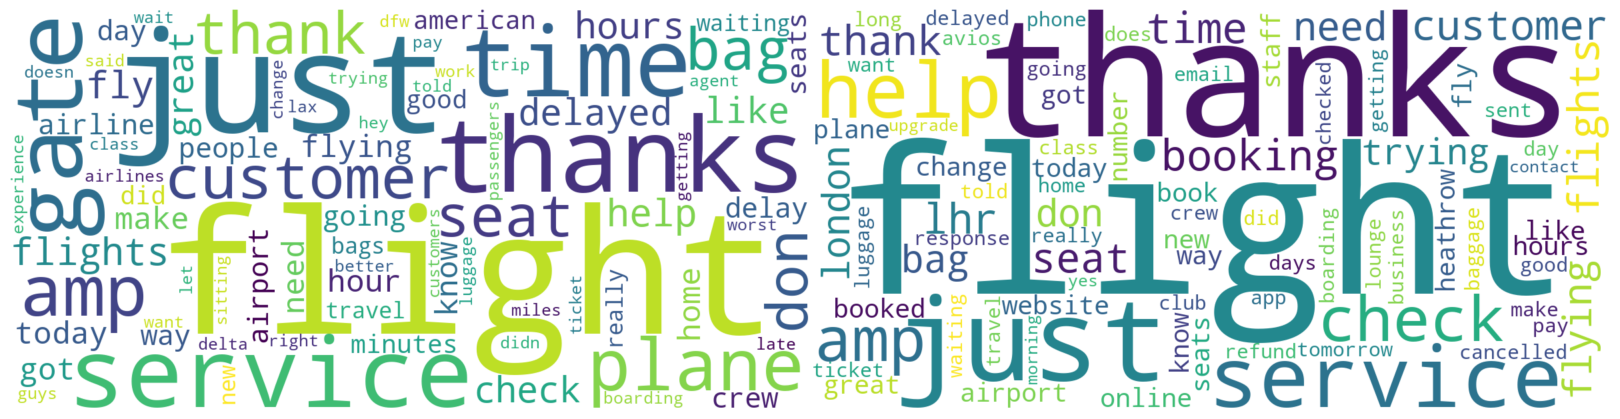

In [31]:
# Wordcloud for multiple corpora 
MAXWORD = 80
TYPE = 'word' # 'word', 'hashtag', 'mention'
METRIC = 'tfidf' # 'tf', 'tfidf'
EXCLUSION = ['https'] + companies

corpora.viz.wordclouds(['AA_C', 'BA_C'], metric=METRIC, max_words=MAXWORD, word_type=TYPE, stopwords=EXCLUSION, lower=True)

### **Interactive Item Timeline**

In [32]:
COL_TIME = 'created_at'
FREQ = '1w'
NAME = 'BA_C'

nlp = spacy.blank('en') #spacy.load('en_core_web_sm')
corpus = process(corpora[NAME], nlp=nlp)

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]

corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, use_custom_dtm=True)
item_timeline.widget()

Spacy Corpus:   0%|          | 0/28144 [00:00<?, ?it/s]

Extract all Hashtags and display their weekly trends
 - Click legend to deselect items
 - Use the search box to display specific hashtag


FigureWidget({
    'data': [{'marker': {'color': 'rgba(220,150,0,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#britishairways',
              'text': [, , , , , , , , , 244.0],
              'textfont': {'color': 'crimson'},
              'textposition': 'bottom center',
              'type': 'scatter',
              'uid': 'e3a77f61-ec66-4f91-8e82-2cb13d494337',
              'x': [2017-10-01 00:00:00, 2017-10-08 00:00:00, 2017-10-15 00:00:00,
                    2017-10-22 00:00:00, 2017-10-29 00:00:00, 2017-11-05 00:00:00,
                    2017-11-12 00:00:00, 2017-11-19 00:00:00, 2017-11-26 00:00:00,
                    2017-12-03 00:00:00],
              'y': array([ 0., 20., 34., 23., 16., 17., 27., 31., 58., 18.])},
             {'marker': {'color': 'rgba(104,14,14,1.0)'},
              'mode': 'lines+markers+text',
              'name': '#ba',
              'text': [, , , , , , , , , 186.0],
              'textfont': {'color': 'crimson'},
      

# 3 Jux<span style="font-size:18px;">tapose</span> a pair of corpora
<div class="alert alert-block alert-info" style="font-size:16px;">
    
The **Jux** is a python package specially developed to work with the **Corpus** package with a focus on comparing and constrasting to highlight the differences between two corpora on the token/word level.  
The idea of **Jux** is to highlight the _features_ of corpus by eliminating the common words that are used in a similar way in both corpora.  
Several metrics have been implemented for measuring the word usage similarity, including term frequency, tfidf, and [Loglikelihood]().
</div>

### As a comparison, what does a wordcloud tell us?

## 3.1 Keyword Analysis

In [28]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

CName1 = 'AA_C'
CName2 = 'BA_C'
TopN = 30

FreqTable1 = corpora[CName1].dtm.freq_table().series.rename(CName1)
FreqTable2 = corpora[CName2].dtm.freq_table().series.rename(CName2)
FT_df = pd.concat([FreqTable1, FreqTable2], axis=1, join='outer').fillna(0)

colour = FT_df[CName1] > FT_df[CName2]
print('Blue: Corpus {}; Red: Corpus {}'.format(CName1, CName2))

jux = Jux(corpora[CName1], corpora[CName2])
llv = jux.stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:TopN].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)


Blue: Corpus AA_C; Red: Corpus BA_C


,log_likelihood_llv,bayes_factor_bic,effect_size_ell
british_airways,52784.507295,52770.544128,0.004893
americanair,44847.108496,44833.145330,0.003945
lhr,1661.291627,1647.328460,0.000226
booking,1493.003067,1479.039901,0.000199
gate,1242.690927,1228.727760,0.000153
london,1239.238331,1225.275165,0.000178
heathrow,1120.300040,1106.336874,0.000168
avios,977.658188,963.695021,0.000159
dfw,784.875039,770.911873,0.000115
american,748.704460,734.741293,0.000105


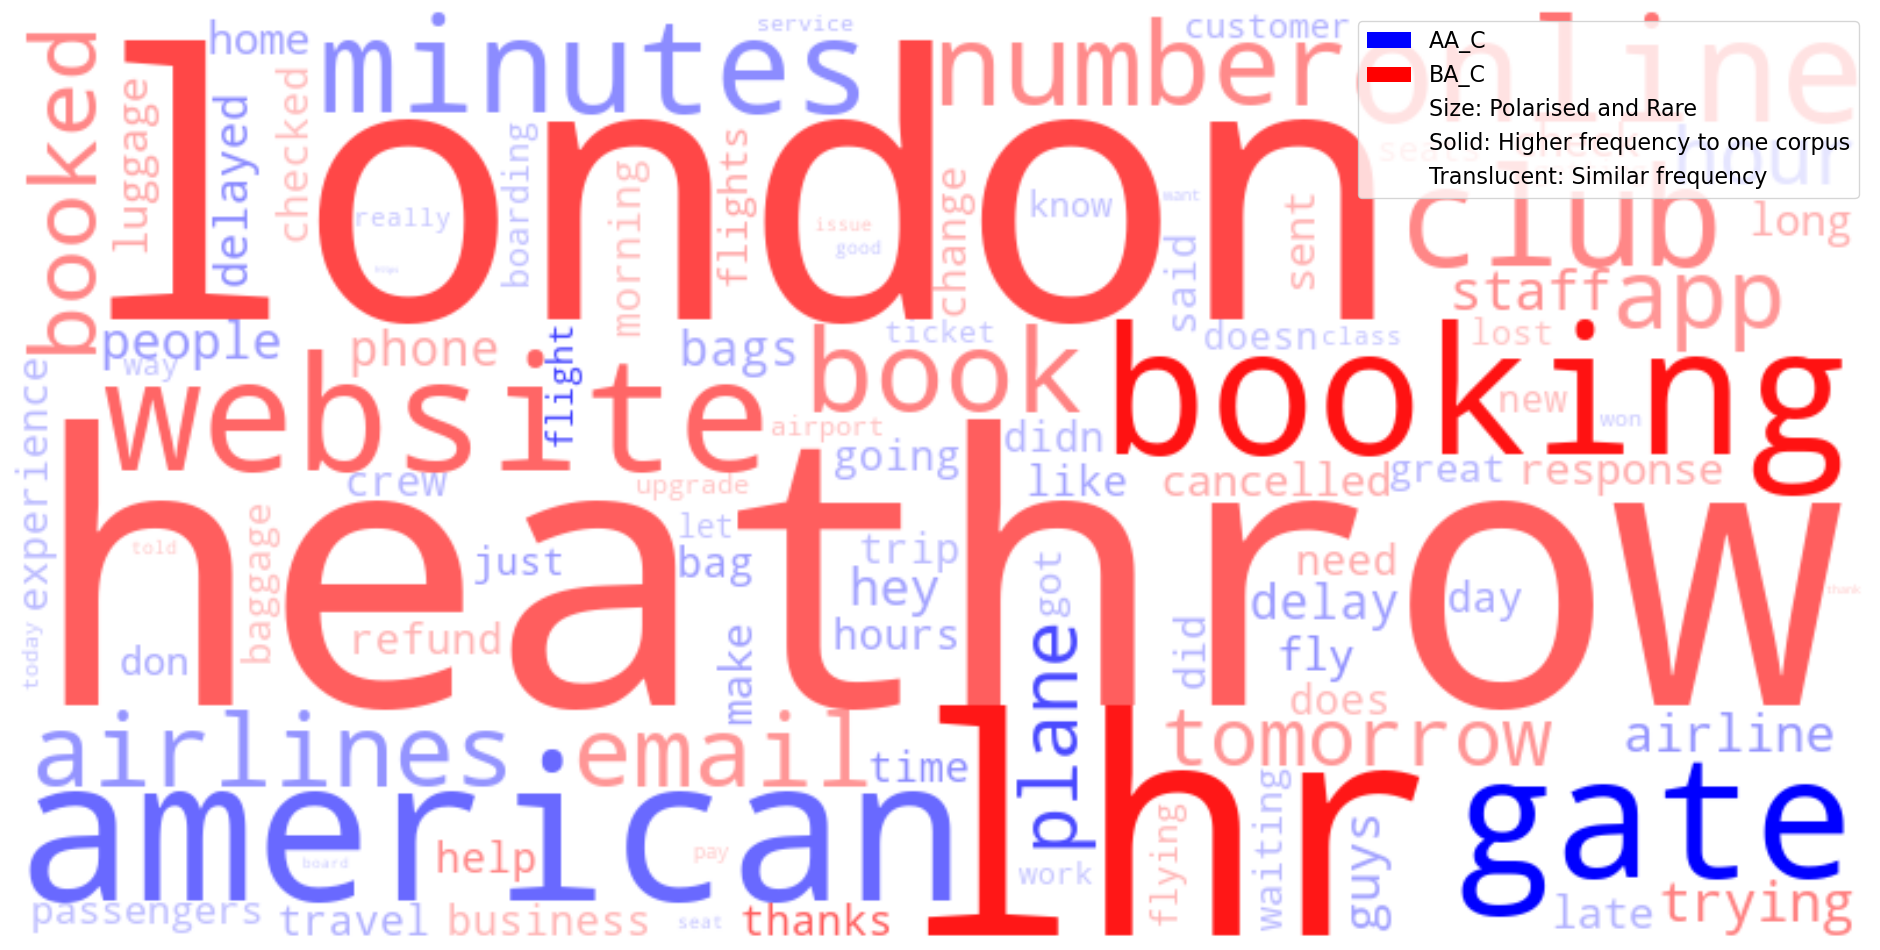

In [35]:
MAXWORD = 100
METRIC = 'tf' # 'tf', 'tfidf', 'log_likelihood'
CName1 = 'AA_C'
CName2 = 'BA_C'

jux_C = Jux(corpora[CName1], corpora[CName2])

jux_C.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)  # change this to 'tfidf' or 'log_likelihood'

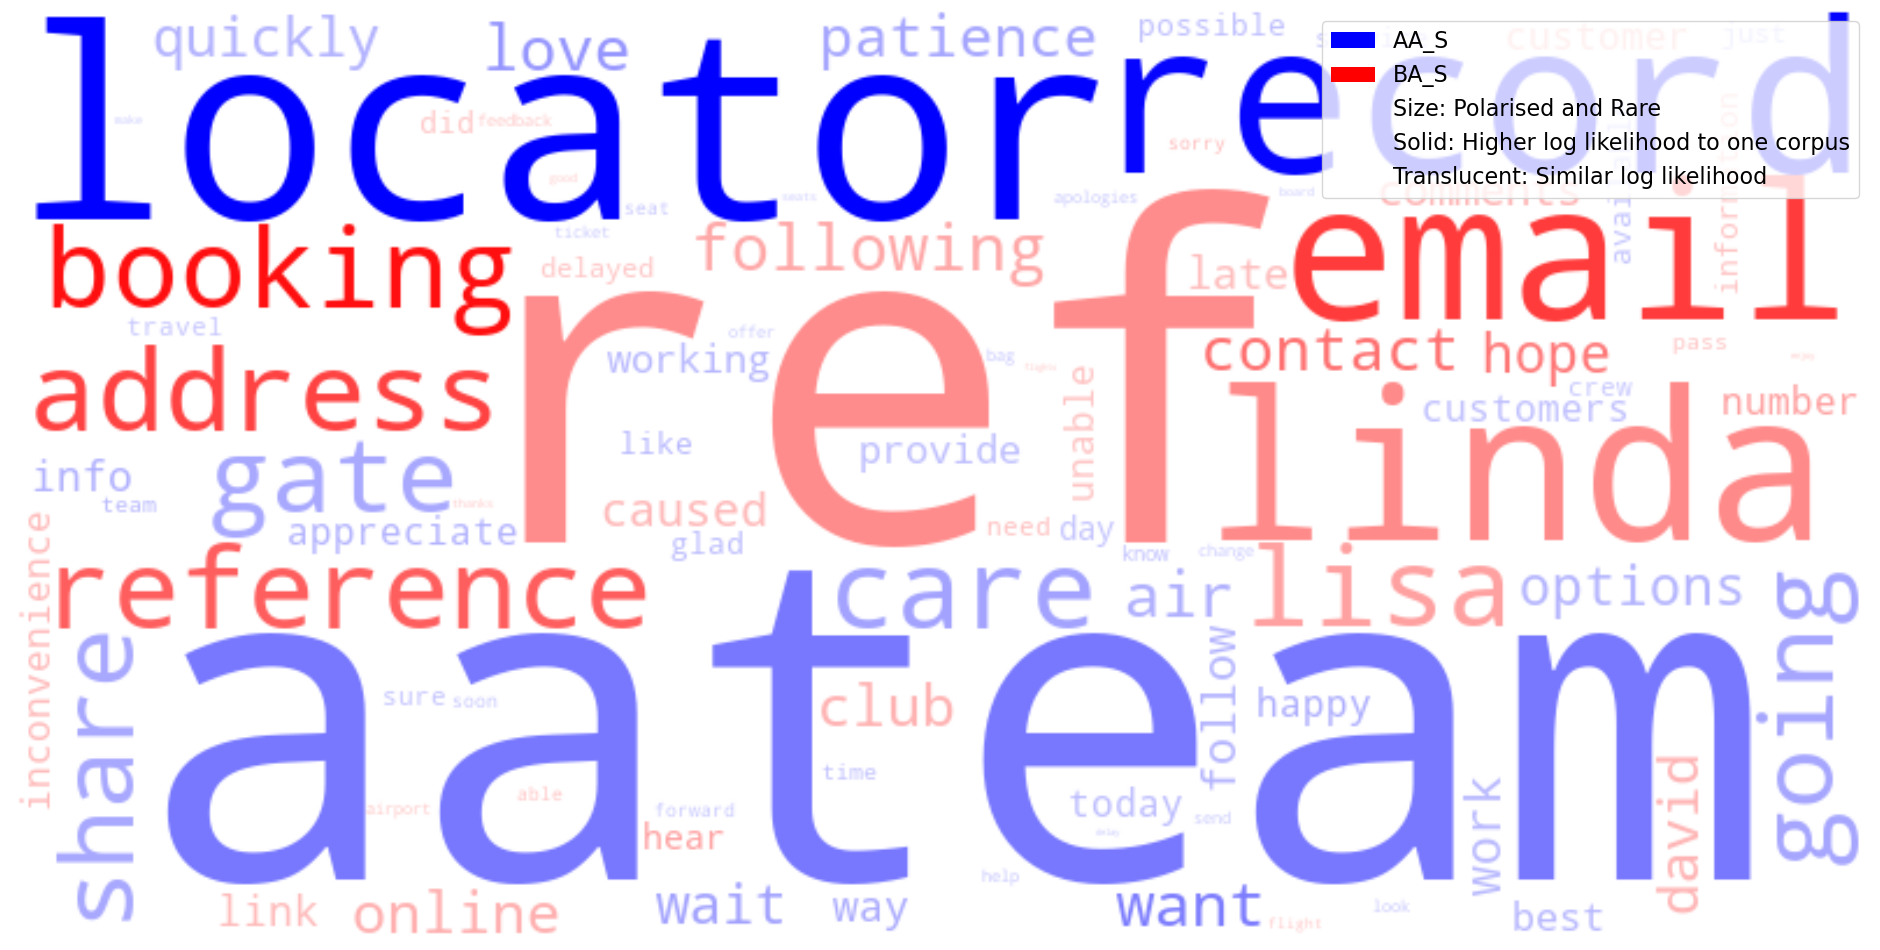

In [30]:
temp = corpora['Service']
AA_S = temp.slicer.filter_by_item('company', 'americanair')
AA_S.rename('AA_S')
BA_S = temp.slicer.filter_by_item('company', 'british_airways')
BA_S.rename('BA_S')

jux_S = Jux(AA_S, BA_S)

jux_S.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=companies)

# 4. Additional Text Analysis with Corpus
<span  style="font-size:16px;">

The power of Juxtorpus lies in comparing and contrasting corpora that are specifically defined and sliced. There are only so many ways to slice the data based on existing metadata, which can be done equivalently in your Excel spreadsheet. However, in this section, we will demonstrate how to run various text analysis tools on the corpus, which enables the user to slice the corpus differently with more meaningful ways.
</span>

## 4.1 Sentiment Analysis

In [75]:
from juxtorpus.analyse import analyse

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

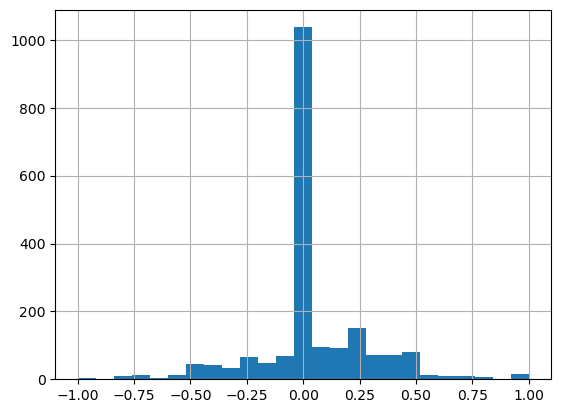

In [36]:
NAME = 'SP_C'

corpus = corpora[NAME].sample(2000)
sentiments = analyse(corpus, method='sentiment', model='textblob', add_results=True)
sentiments.render()

In [37]:
neg = corpus.slicer.filter_by_range('#sentiment', max_=-0.25)
pos = corpus.slicer.filter_by_range('#sentiment', min_=0.25)
neg.rename('neg')
pos.rename('pos')

SP_C


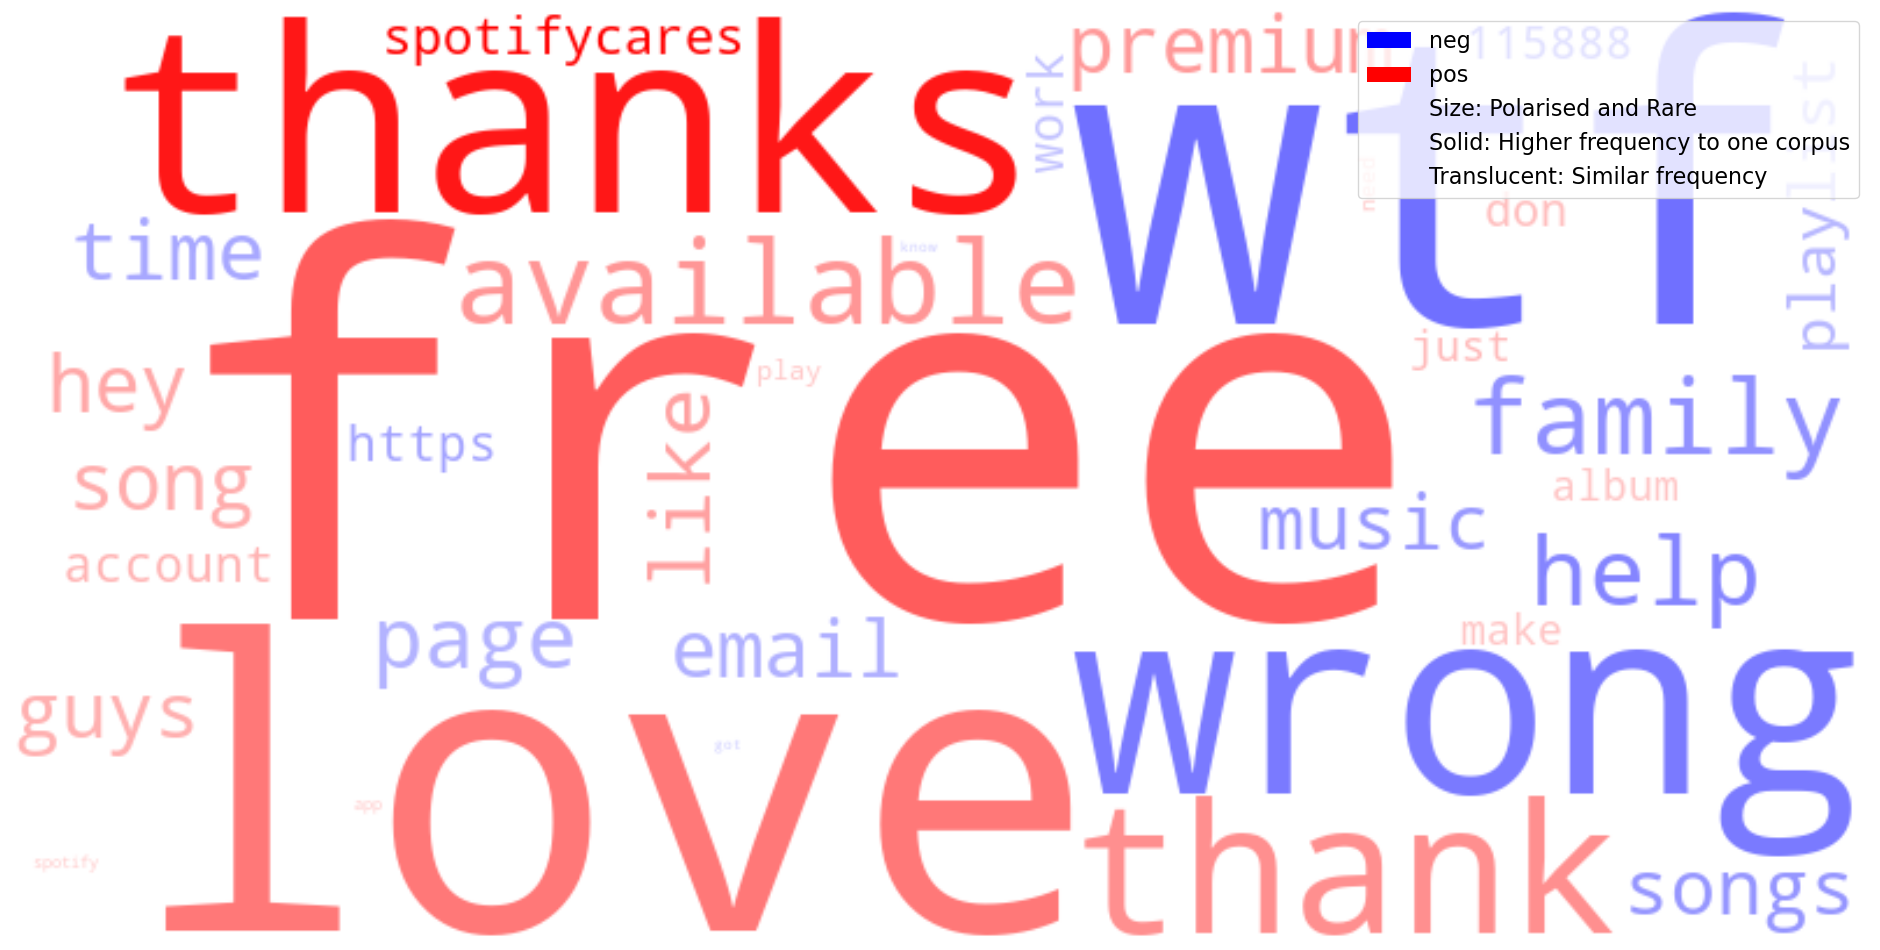

In [38]:
jux = Jux(neg, pos)
print(NAME)
jux.polarity.wordcloud(metric='tf', top=35, colours=('blue', 'red')) 

In [39]:
conc = ConcordanceLoader(type='corpus', df_input = neg)
conc.show()

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

Spacy Corpus:   0%|          | 0/2000 [00:00<?, ?it/s]

[INFO] aaN already exists. It renamed to aaN_
[INFO] baN already exists. It renamed to baN_


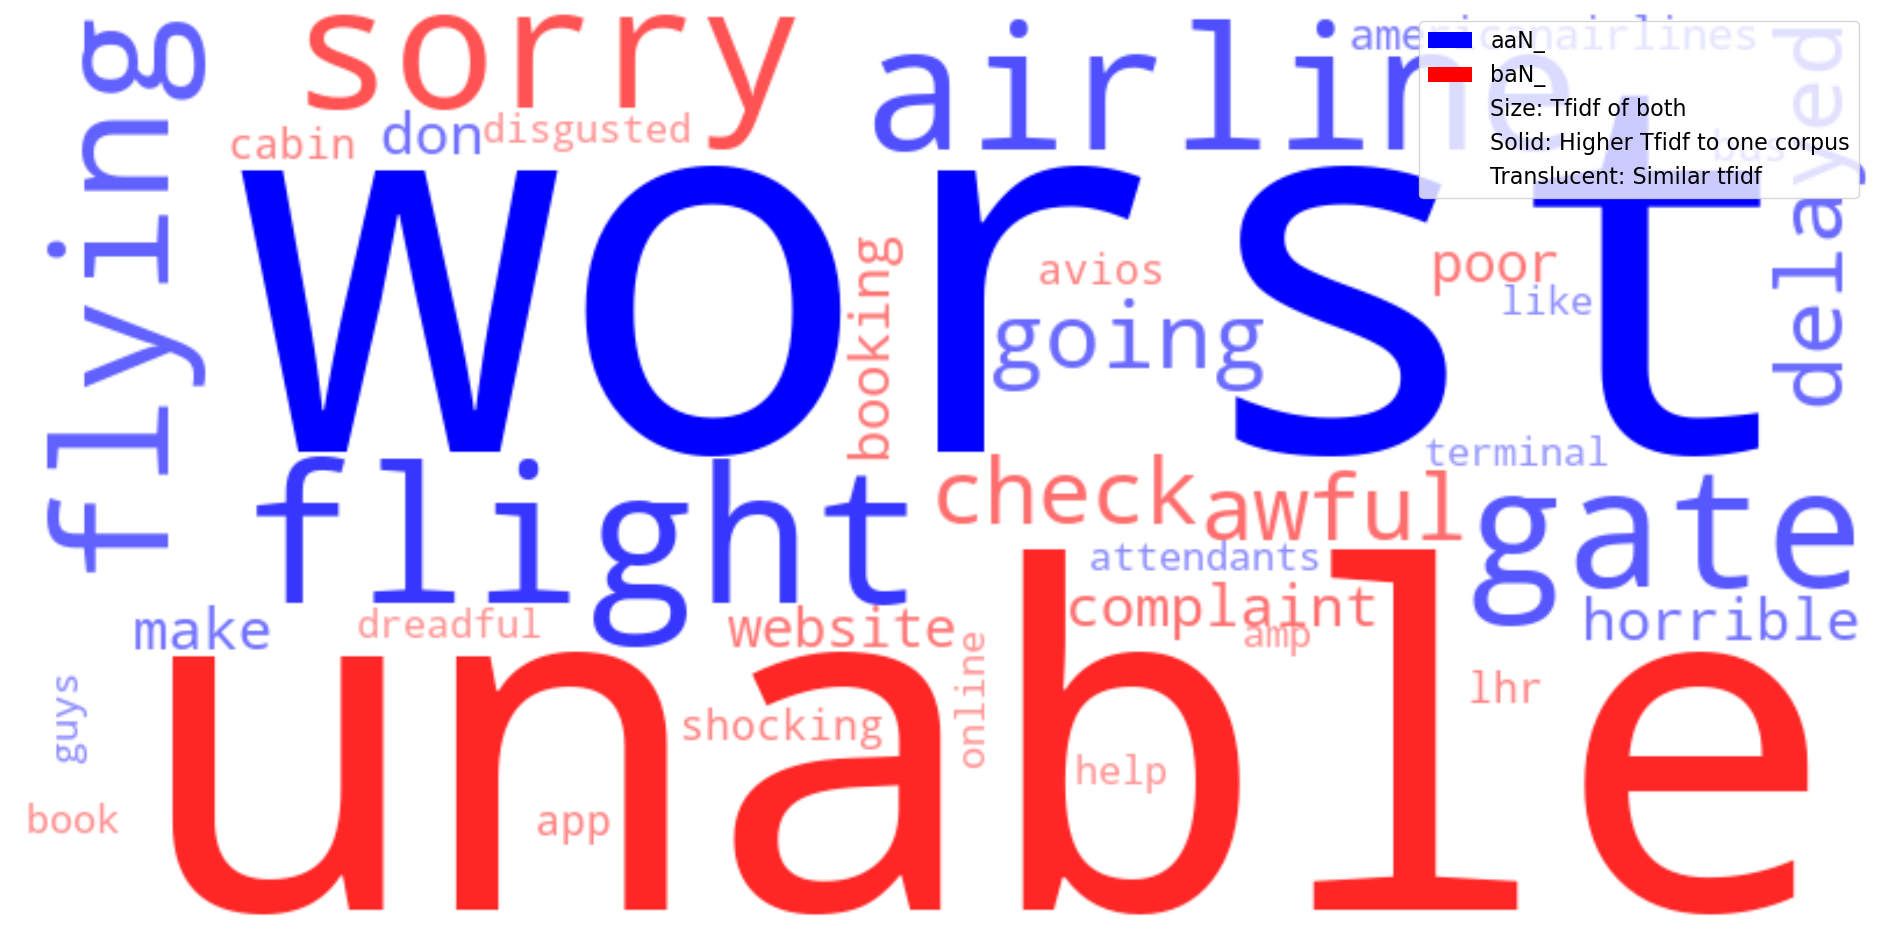

In [36]:
aa = corpora['AA_C'].sample(2000)
ba = corpora['BA_C'].sample(2000)
sentiments = analyse(aa, method='sentiment', model='textblob', add_results=True)
sentiments = analyse(ba, method='sentiment', model='textblob', add_results=True)
#sentiments.render()

aa_neg = sp.slicer.filter_by_range('#sentiment', max_=-0.25)
ba_neg = cc.slicer.filter_by_range('#sentiment', max_=-0.25)
aa_neg.rename('aaN')
ba_neg.rename('baN')
jux = Jux(aa_neg, ba_neg)
jux.polarity.wordcloud(metric='tfidf', top=35, colours=('blue', 'red'), stopwords = companies + [], lower=False) 

In [37]:
conc = ConcordanceLoader(type='corpus', df_input = ba_neg)
conc.show()

## 4.2 Quotation Tool

In [6]:
inc_ent = ['ORG','PERSON','GPE','NORP','FAC','LOC']

qt_corpus, qt = analyse(corpora['News'], method='quotation', doc_id='text_name', entities=inc_ent)
corpora.add(qt_corpus)
corpora.widget()

Loading spaCy language model...
This may take a while...
Finished loading.
Extracting quotes...
This may take a while...


100%|███████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 10.96it/s]


In [11]:
meta_cols = corpora['News']._meta_registry.keys()
df = corpora['News'].to_dataframe().loc[:, meta_cols]

In [41]:
qt.analyse_quotes(inc_ent)

## 4.3 Topic Modelling

In [41]:
NUM_TOPICS = 8
MODE = 'tf'
NAME = 'News'

lda = analyse(corpora[NAME], method='topic_model', num_topics=NUM_TOPICS, mode=MODE, add_results=True)
lda.widget()

/Users/mily/miniconda3/envs/jux/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.196676 -0.042342       1        1  32.320093
0     -0.139944 -0.102877       2        1  20.391059
7     -0.051622  0.205935       3        1  13.145027
6     -0.064422 -0.034738       4        1   7.467483
3     -0.068831 -0.030907       5        1   6.996628
1      0.119987 -0.003920       6        1   6.863590
5     -0.036456 -0.003352       7        1   6.849485
2      0.044612  0.012200       8        1   5.966634, topic_info=          Term       Freq      Total Category  logprob  loglift
860   morrison  40.000000  40.000000  Default  30.0000  30.0000
843   minister  36.000000  36.000000  Default  29.0000  29.0000
571        gas  17.000000  17.000000  Default  28.0000  28.0000
452     energy  19.000000  19.000000  Default  27.0000  27.0000
575    general  10.000000  10.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
685   industry   1.111130   6.924866   Topic8  -5.2066   0.9892
1206     scott   1.111130   7.657373   Topic8  -5.2066   0.8887
881        new   1.111120  12.881775   Topic8  -5.2066   0.3685
521    federal   1.111120   9.809530   Topic8  -5.2066   0.6410
1374      time   1.111119   7.383459   Topic8  -5.2066   0.9251

[444 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         2  0.343817    000
0         4  0.171909    000
0         5  0.171909    000
0         7  0.343817    000
5         4  0.820276    14m
...     ...       ...    ...
1482      4  0.099877   year
1482      5  0.199754   year
1482      7  0.199754   year
1483      4  0.428563  years
1483      7  0.428563  years

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 8, 7, 4, 2, 6, 3])

In [56]:
corpora.widget()

In [73]:
# What are the client complaining about
import numpy as np
temp = corpora['CC_C'].slicer.filter_by_item('author_id', '116136')
conv_ids = temp.meta['conversation'].series.values.unique().tolist()
customer = corpora['CS'].slicer.filter_by_item('conversation', conv_ids)

# Keyword Analysis based on Log Likelihood

Future plans: using Log likelihood to analyse keywords (currently being integrated)


Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
https://ucrel.lancs.ac.uk/llwizard.html

# Questions and feedbacks 

### Please take a couple minutes to fill our feedback form, let us know how we did and what you would like to see.
http://bit.ly/3BSj1wC

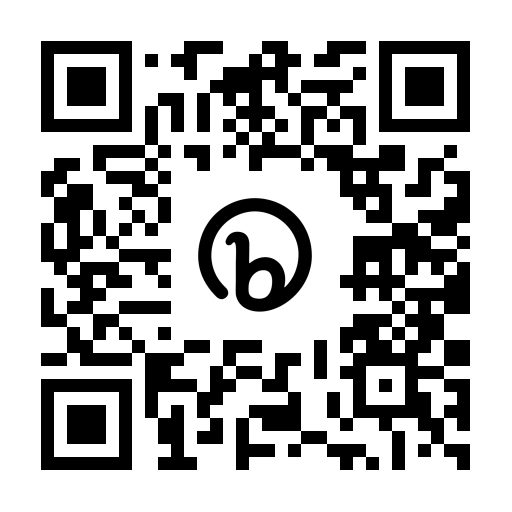

We will run a full workshop in semester 2 and we shall officially release the Juxtorpus tool to the public before then.
If you would like to be the early adoptor and help us by testing the tool and provide feedbacks on bugs and improvement, please express your interest either in the feedback form, or send an email to me at chao.sun@sydney.edu.au

If you use some of our ATAP tools in your research, we would like to know your research outcome and please cite the notebook/software, and acknowledge the Sydney Informatics Hub.
